In [48]:
pip install pandoc


  Using cached pandoc-2.3-py3-none-any.whl
  Obtaining dependency information for plumbum from https://files.pythonhosted.org/packages/6f/e8/a9a580d1d67825d8bdc16f3993ea58c4066769d5f8ba34caaa69a5344b39/plumbum-1.8.2-py3-none-any.whl.metadata
  Using cached plumbum-1.8.2-py3-none-any.whl.metadata (10 kB)
Using cached plumbum-1.8.2-py3-none-any.whl (127 kB)


In [42]:
# Data processing libraries
import numpy as np
from numpy import mean, std, dstack
import pandas as pd
from pandas import read_csv
import time
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Machine learning libraries
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
# Deep learning libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, LSTM, ConvLSTM2D, Conv1D, MaxPooling1D
import tensorflow.keras.optimizers as optimizers
from sklearn.metrics import classification_report
from tensorflow.keras.layers import TimeDistributed

# Loading Data

In [2]:
# Upload dataset
#C:\Users\habib\diylc\CW2_T2\HAR

from zipfile import ZipFile
filename ="/Users/habib/diylc/CW2_T2/HAR_Dataset.zip"
with ZipFile(filename, 'r') as zip :
  zip.extractall()
  print('done')

done


# Data Preprocessing

In [3]:
# load a single file as a numpy array
def load_file(filepath):
    dataframe = read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

In [4]:
# Load a list of files and return as a 3D numpy array
def load_group(filenames, prefix=''):
    # Initialize an empty list to store loaded data
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    # Stack the loaded data along the third dimension creating a 3D numpy array
    loaded = np.dstack(loaded)
    # Return the 3D numpy array containing the loaded data
    return loaded

In [5]:
# Load a dataset group, such as train or test
def load_dataset_group(group, prefix=''):
    # Construct the file path for the group's signals data
    filepath = prefix + group + '/signals/'
    # Define a list of file names for the signals data
    filenames = list()
    # accelerometer data file names
    filenames += ['acc_x_' + group + '.txt', 'acc_y_' + group + '.txt', 'acc_z_' + group + '.txt']
    # gyroscope data file names
    filenames += ['gyro_x_' + group + '.txt', 'gyro_y_' + group + '.txt', 'gyro_z_' + group + '.txt']
    X = load_group(filenames, filepath)
    y = load_file(prefix + group + '/y_' + group + '.txt')
    # reeturn the input data X and class output data Y
    return X, y

In [6]:
# load the dataset, returns train and test X and y elements
def load_dataset(prefix=''):
    # load all train
    trainX, trainy = load_dataset_group('train', prefix + 'HAR_Dataset/')
    #print(trainX.shape, trainy.shape)
    # load all test
    testX, testy = load_dataset_group('test', prefix + 'HAR_Dataset/')
    #print(testX.shape, testy.shape)
    trainy = trainy - 1
    testy = testy - 1
    trainy = to_categorical(trainy)
    testy = to_categorical(testy)
    print('trainX : '+ str(trainX.shape))
    print('trainy : '+ str(trainy.shape))
    print('test X : '+ str(testX.shape))
    print('test y : '+ str(testy.shape))
  #	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
    return trainX, trainy, testX, testy

In [7]:
trainX, trainy, testX, testy = load_dataset()

trainX : (7352, 128, 6)
trainy : (7352, 6)
test X : (2947, 128, 6)
test y : (2947, 6)


In [8]:
print(trainX.shape, trainy.shape)

(7352, 128, 6) (7352, 6)


In [9]:
print(testX.shape, testy.shape)

(2947, 128, 6) (2947, 6)


In [28]:
activity_labels = {
    1: 'Walking',
    2: 'Walking Upstairs',
    3: 'Walking Downstairs',
    4: 'Sitting',
    5: 'Standing',
    6: 'Laying'}


# Data Visualization

Text(0.5, 0, 'Timestep')

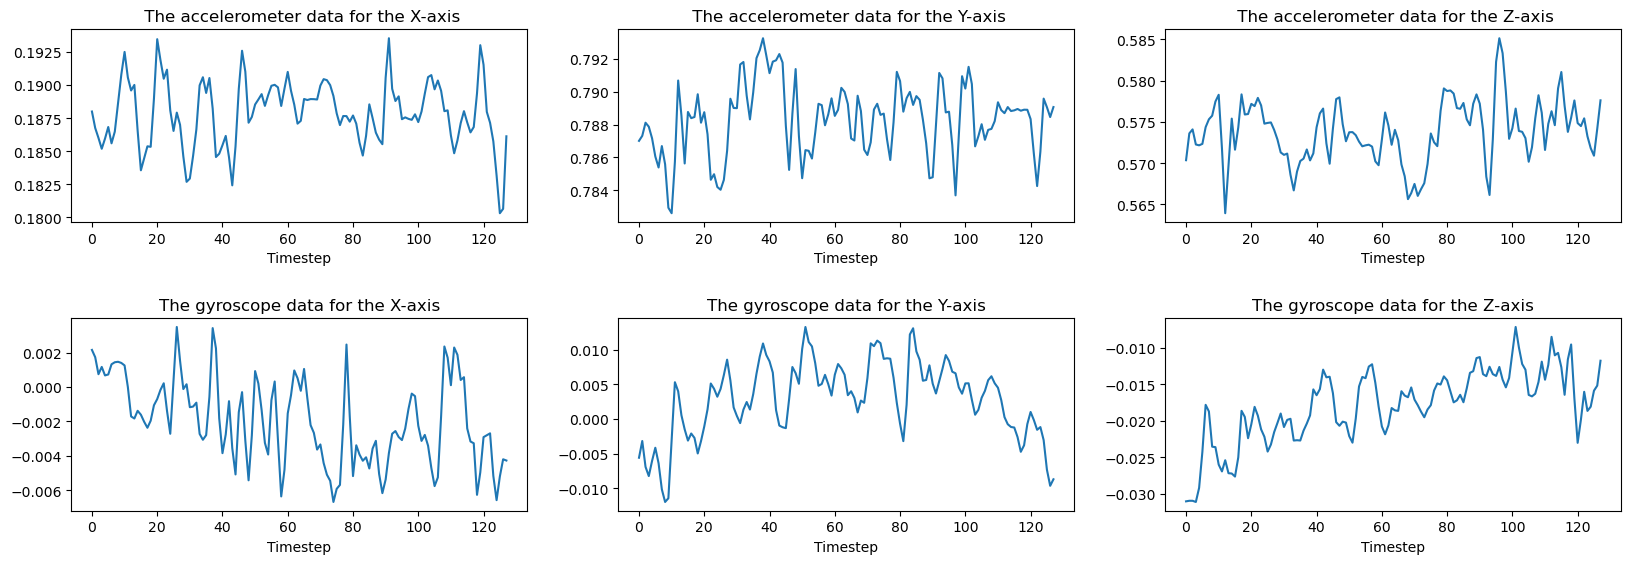

In [35]:
index_values = ['acc_x_', 'acc_y_', 'acc_z_', 'gyro_x_' , 'gyro_y_', 'gyro_z_']
col = list(range(128))
df = pd.DataFrame(data = trainX[55] ,  
                  index = col,  
                  columns = index_values) 
df.head

fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)

plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 100 

plt.subplot(3,3,1)
plt.plot(df.acc_x_[:])
plt.title(' The accelerometer data for the X-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,2)
plt.plot(df.acc_y_)
plt.title(' The accelerometer data for the Y-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,3)
plt.plot(df.acc_z_)
plt.title(' The accelerometer data for the Z-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,4)
plt.plot(df.gyro_x_)
plt.title('The gyroscope data for the X-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,5)
plt.plot(df.gyro_y_)
plt.title('The gyroscope data for the Y-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,6)
plt.plot(df.gyro_z_)
plt.title('The gyroscope data for the Z-axis')
plt.xlabel('Timestep')


[1. 0. 0. 0. 0. 0.]


Text(0.5, 0, 'Timestep')

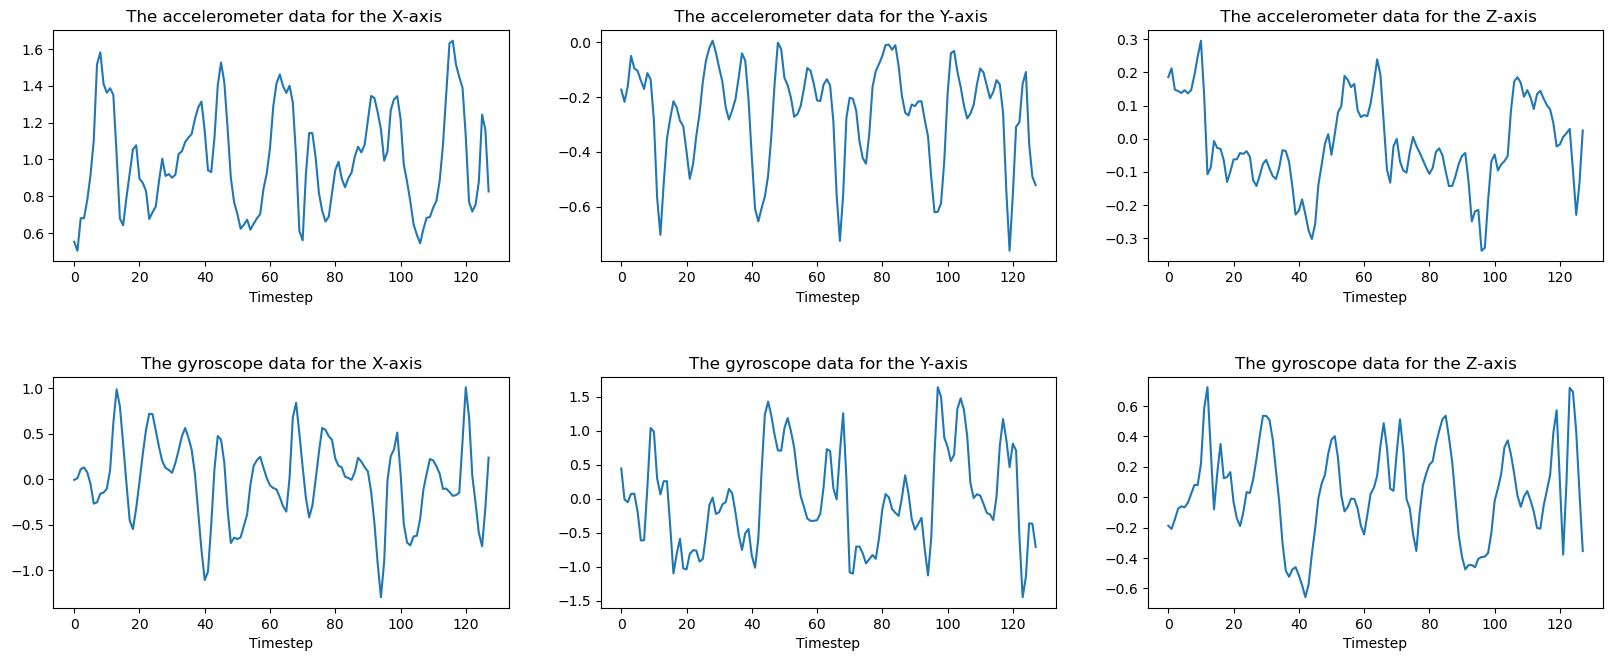

In [36]:
df = pd.DataFrame(data = trainX[100] ,  
                  index = col,  
                  columns = index_values) 
df.head
print(trainy[100])
fig = plt.figure()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams['figure.dpi'] = 100 

plt.subplot(3,3,1)
plt.plot(df.acc_x_[:])
plt.title(' The accelerometer data for the X-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,2)
plt.plot(df.acc_y_)
plt.title(' The accelerometer data for the Y-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,3)
plt.plot(df.acc_z_)
plt.title(' The accelerometer data for the Z-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,4)
plt.plot(df.gyro_x_)
plt.title('The gyroscope data for the X-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,5)
plt.plot(df.gyro_y_)
plt.title('The gyroscope data for the Y-axis')
plt.xlabel('Timestep')

plt.subplot(3,3,6)
plt.plot(df.gyro_z_)
plt.title('The gyroscope data for the Z-axis')
plt.xlabel('Timestep')

# LSTM Network Model

In [44]:
# Model Building
def evaluate_model_LSTM(trainX, trainy, testX, testy):
    verbose, epochs, batch_size = 0, 20, 64
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    rmsprop = optimizers.RMSprop(learning_rate=0.001)
    model = Sequential()
    model.add(LSTM(90, return_sequences=True, input_shape=(n_timesteps,n_features)))
    model.add(Dropout(0.5))
    model.add(LSTM(90))
    model.add(Dropout(0.5))
    model.add(Dense(90, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))

    # Model Compilation
    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    model.summary()

    # Model Training
    history = model.fit(trainX, trainy, validation_split=0.33 ,  epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Model Evaluation
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
   
    # list all data in history
    plt.rcParams['figure.figsize'] = [8, 3]
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Confusion Matrix
    y_pred=np.argmax(model.predict(testX), axis=-1) # Calculate y_pred
    testy=np.argmax(testy, axis=1)
    matrix=confusion_matrix( testy,y_pred)
     # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[ 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], yticklabels=[ 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # summary report
    print(classification_report(testy,y_pred))

    return accuracy
     

trainX : (7352, 128, 6)
trainy : (7352, 6)
test X : (2947, 128, 6)
test y : (2947, 6)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 128, 90)           34920     
                                                                 
 dropout_2 (Dropout)         (None, 128, 90)           0         
                                                                 
 lstm_3 (LSTM)               (None, 90)                65160     
                                                                 
 dropout_3 (Dropout)         (None, 90)                0         
                                                                 
 dense_2 (Dense)             (None, 90)                8190      
                                                                 
 dense_3 (Dense)             (None, 6)                 546       
                                  

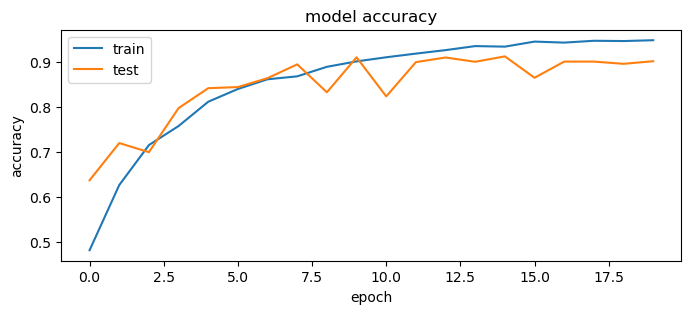

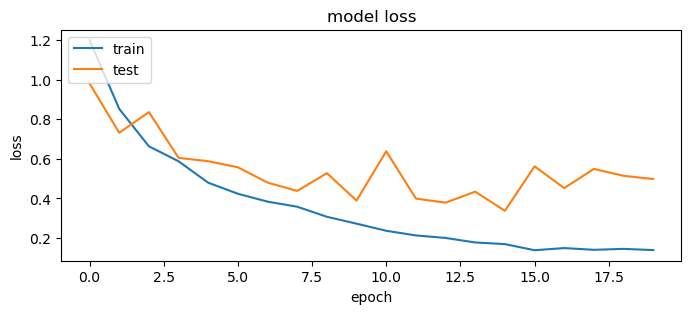

93/93 [==============================] - 10s 80ms/step


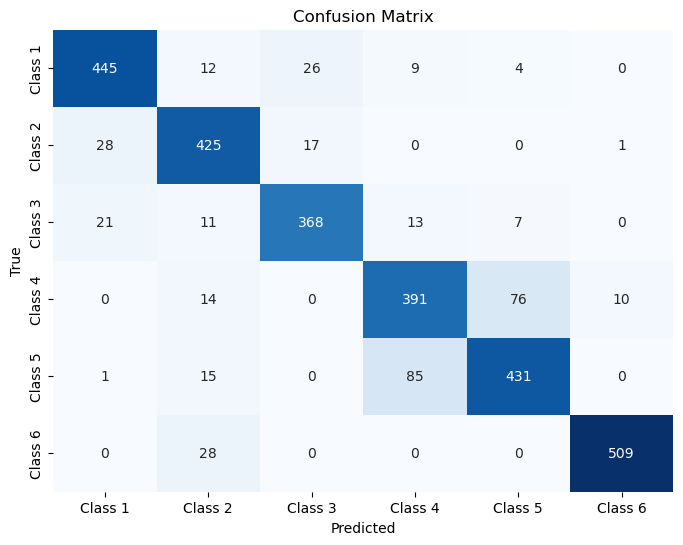

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       496
           1       0.84      0.90      0.87       471
           2       0.90      0.88      0.89       420
           3       0.79      0.80      0.79       491
           4       0.83      0.81      0.82       532
           5       0.98      0.95      0.96       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947

Accuracy: 87.17339634895325
Total time for training:  842.2482759952545 seconds


In [45]:
# Model Accuracy
trainX, trainy, testX, testy = load_dataset()

scores = list()
start = time.time()
score = evaluate_model_LSTM(trainX, trainy, testX, testy)
score = score * 100.0
print('Accuracy: ' + str(score))
print("Total time for training: ", time.time() - start, "seconds")

In [ ]:
# plot AUC ROC CURVE
#preds = y_pred
#fpr, tpr, threshold = metrics.roc_curve(testy, y_pred)
#roc_auc = metrics.auc(fpr, tpr)

#import matplotlib.pyplot as plt
#plt.title('Receiver Operating Characteristic')
#plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0, 1])
#plt.ylim([0, 1])
#plt.ylabel('True Positive Rate')
#plt.xlabel('False Positive Rate')
#plt.show()

# CNN-LSTM Network Model

In [46]:
# Model Building
def evaluate_model_CNN_LSTM(trainX, trainy, testX, testy):
# fit and evaluate a model

   # define model
    verbose, epochs, batch_size = 0, 25, 128
    # Choice of learning rate- Accuracy of model increase as the Learning rate decrease . So, at 0.001 model gives maximum accuracy
    adam = optimizers.Adam(learning_rate=0.001)
    n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
    # reshape data into time steps of sub-sequences
    n_steps, n_length = 4, 32
    trainX = trainX.reshape((trainX.shape[0], n_steps, n_length, n_features))
    testX = testX.reshape((testX.shape[0], n_steps, n_length, n_features))
    # define model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(80 , return_sequences=True))
    model.add(LSTM(80 , return_sequences=True))
    model.add(LSTM(80))
    model.add(Dropout(0.5))   # dropout has been added to prevent model from overfitting.
    model.add(Dense(100, activation='relu'))
    model.add(Dense(n_outputs, activation='softmax'))

    # Model Compilation
    model.compile(loss='categorical_crossentropy', optimizer=adam , metrics=['accuracy'])
    model.summary()

    # Model Training
    history = model.fit(trainX, trainy, validation_split=0.33 ,epochs=epochs, batch_size=batch_size, verbose=verbose)

    # Model Evaluation
    _, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
  
  
    # list all data in history
    plt.rcParams['figure.figsize'] = [8, 3]
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Confusion Matrix
    y_pred=np.argmax(model.predict(testX), axis=-1) # Calculate y_pred
    testy=np.argmax(testy, axis=1)
    matrix=confusion_matrix( testy,y_pred)
     # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=[ 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'], yticklabels=[ 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    
    # summary report
    print(classification_report(testy,y_pred))

    return accuracy
     

trainX : (7352, 128, 6)
trainy : (7352, 6)
test X : (2947, 128, 6)
test y : (2947, 6)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 30, 256)     4864      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 28, 256)     196864    
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 26, 256)     196864    
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 26, 256)     0         
 stributed)                                                      
                                  

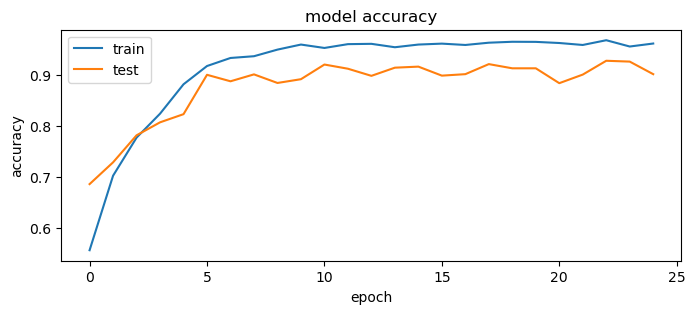

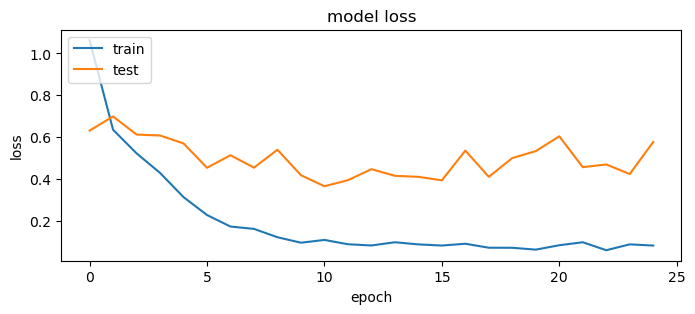

93/93 [==============================] - 8s 48ms/step


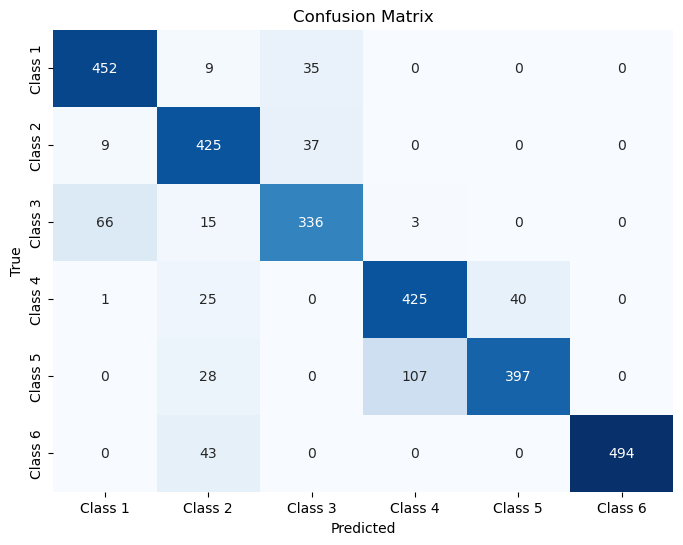

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       496
           1       0.78      0.90      0.84       471
           2       0.82      0.80      0.81       420
           3       0.79      0.87      0.83       491
           4       0.91      0.75      0.82       532
           5       1.00      0.92      0.96       537

    accuracy                           0.86      2947
   macro avg       0.86      0.86      0.86      2947
weighted avg       0.86      0.86      0.86      2947

Accuracy: 85.81608533859253
Total time for training:  887.2502069473267 seconds


In [47]:
# Model Accuracy
trainX, trainy, testX, testy = load_dataset()
scores = list()
start = time.time()
score = evaluate_model_CNN_LSTM(trainX, trainy, testX, testy)
score = score * 100.0
print('Accuracy: ' + str(score))
print("Total time for training: ", time.time() - start, "seconds")